# Stackoverflow 2020 Developer Survey Analysis
***

In this notebook, I am analyzing the Stackoverflow 2020 Developer Survey data, which could be obtained from the following link: [https://insights.stackoverflow.com/survey](https://insights.stackoverflow.com/survey).

The first thing to do is to explore the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Initialize the data and its schema into Pandas dataframe
df = pd.read_csv('developer_survey_2020/survey_results_public.csv')
schema = pd.read_csv('developer_survey_2020/survey_results_schema.csv')

In [3]:
# Observing their shape
print(df.shape)
print(schema.shape)

(64461, 61)
(61, 2)


In [4]:
# Observing the dataframe
df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [5]:
# Make the 'Respondent' an index column and save it to a different variable
df_res = df.set_index('Respondent')

In [6]:
df_res.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [7]:
# Obeserving the columns
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    64162 non-null  object 
 1   Hobbyist                      64416 non-null  object 
 2   Age                           45446 non-null  float64
 3   Age1stCode                    57900 non-null  object 
 4   CompFreq                      40069 non-null  object 
 5   CompTotal                     34826 non-null  float64
 6   ConvertedComp                 34756 non-null  float64
 7   Country                       64072 non-null  object 
 8   CurrencyDesc                  45472 non-null  object 
 9   CurrencySymbol                45472 non-null  object 
 10  DatabaseDesireNextYear        44070 non-null  object 
 11  DatabaseWorkedWith            49537 non-null  object 
 12  DevType                       49370 non-null  object 
 13  E

In [8]:
# Observing the numerical columns
df_res.describe()

,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,30.834111,3.190464e+242,1.037561e+05,40.782174
std,9.585392,inf,2.268853e+05,17.816383
min,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,35.000000,1.250000e+05,9.500000e+04,44.000000
max,279.000000,1.111111e+247,2.000000e+06,475.000000


<AxesSubplot:>

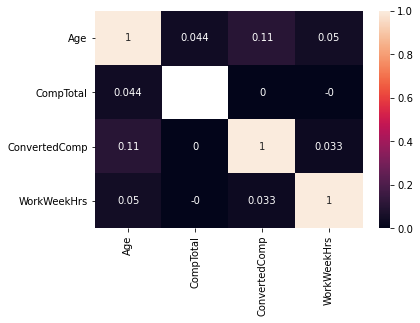

In [9]:
# Observing correlations between them
df_res_corr = df_res.corr()
sns.heatmap(df_res_corr, annot=True)

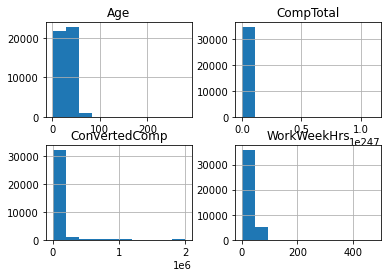

In [10]:
# Observing their histograms
df_res.hist();

In [11]:
# Observing some categorical columns
df_res['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [12]:
df_res['DevType'].value_counts()

Developer, full-stack                                                                                                                                4424
Developer, back-end                                                                                                                                  3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                       2227
Developer, back-end;Developer, full-stack                                                                                                            1476
Developer, front-end                                                                                                                                 1401
                                                                                                                                                     ... 
Developer, back-end;Developer, embedded applications or devices;Developer, f

In [13]:
df_res['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                           1073
HTML/CSS;JavaScript                                                    900
C#;HTML/CSS;JavaScript;SQL                                             856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                  754
HTML/CSS;JavaScript;TypeScript                                         697
                                                                      ... 
C;C#;Dart;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;Swift              1
Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Objective-C;Swift       1
C;C++;Go;Java;JavaScript;Perl;Python;Ruby;Rust;SQL;VBA                   1
Bash/Shell/PowerShell;C;Perl;PHP;Python                                  1
Bash/Shell/PowerShell;C;Java;JavaScript;PHP;Python;Ruby;Scala;SQL        1
Name: LanguageWorkedWith, Length: 14256, dtype: int64

In [14]:
df_res['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [15]:
df_res['YearsCodePro'].value_counts()

3                     4815
2                     4814
5                     3978
4                     3716
1                     2818
6                     2741
10                    2735
8                     2234
7                     2229
Less than 1 year      2174
15                    1531
12                    1460
20                    1416
9                     1232
11                     947
13                     904
14                     758
16                     624
25                     583
18                     533
17                     475
22                     444
19                     373
30                     370
21                     341
23                     321
24                     259
26                     180
35                     162
27                     149
28                     128
32                     103
40                     101
33                      93
31                      80
34                      79
29                      72
3

In [16]:
df_res['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   31582
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin

In [17]:
df_res['UndergradMajor'].isnull().mean()

0.20890150633716512

## Reflection on the data

From the above exploration, we could see that some categorical columns contain values that are grouped together, such as `LanguageWorkedWith`, where a person could have worked with more than one programming language.

Also at this point, I am interested in exploring more about the programming languages and developer types data: what are the popular languages or developer types, or if there is any difference in salary or compensation for people who have worked on certain language or work as a certain type of developer.

Thus, the following questions would be what I will focus on analyzing in this notebook:
1. What are the most popular programming language and developer type for Stackoverflow users?
2. How do different programming languages and developer types relate to salary?
3. Does higher education introduce a bias to the result of the previous questions?

## 1. What are the most popular programming language and developer type for Stackoverflow users?

In order to answer this question, and some other questions posed above, I need to clean up the values of `LanguageWorkedWith` and `DevType` by ungrouping them and count how many people attribute themselves with certain language or developer type.

In [18]:
# Observing the question text of these columns
list(schema[schema['Column'] == 'LanguageWorkedWith']['QuestionText'])

['Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)']

In [19]:
list(schema[schema['Column'] == 'DevType']['QuestionText'])

['Which of the following describe you? Please select all that apply.']

First of all, let's see the missing values of these columns.

In [20]:
df_res['LanguageWorkedWith'].isnull().mean()

0.10988039279564388

In [21]:
df_res['DevType'].isnull().mean()

0.23411054746280696

From the above, there are around 11% missing values in the `LanguageWorkedWith` column and around 23.4% missing values in the `DevType` column.

Here are my high-level plans in approaching this question:
1. Remove the missing values, since for now I am only interested in the prevalence of languages and developer types.
2. Ungroup the values and identify what are the possible indivual values.
3. Create new dataframes for each column with its values and their counts.
4. Analyze the descriptive statistics and visualization to answer the question.

### Removing missing values

In [22]:
# Saving a dataframe with no LanguageWorkedWith missing value
df_lang_clean = df_res.loc[df_res['LanguageWorkedWith'].isnull() == False]

# Checking whether it is clean
df_lang_clean['LanguageWorkedWith'].isnull().mean()

0.0

In [23]:
# Saving a dataframe with no DevType missing value
df_dev_clean = df_res.loc[df_res['DevType'].isnull() == False]

# Checking whether it is clean
df_dev_clean['DevType'].isnull().mean()

0.0

### Ungroup values and list possible values

In [24]:
# Creating a list of LanguageWorkedWith values to be ungrouped
lang_list = list(df_lang_clean['LanguageWorkedWith'])

# Creating a dictionary to count each individual language and to create a new dataframe
lang_dict = {}

# Parse through each LanguageWorkedWith values
for lang_val in lang_list:
    split_vals = lang_val.split(';')
    for lang in split_vals:
        if lang in lang_dict:
            lang_dict[lang] += 1
        else:
            lang_dict[lang] = 1

In [25]:
# Checking the dictionary
lang_dict

{'C#': 18041,
 'HTML/CSS': 36181,
 'JavaScript': 38822,
 'Swift': 3397,
 'Objective-C': 2340,
 'Python': 25287,
 'Ruby': 4046,
 'SQL': 31413,
 'Java': 23074,
 'PHP': 15007,
 'C': 12487,
 'TypeScript': 14578,
 'Bash/Shell/PowerShell': 18980,
 'Kotlin': 4468,
 'R': 3288,
 'VBA': 3499,
 'Perl': 1796,
 'Scala': 2052,
 'C++': 13707,
 'Go': 5038,
 'Haskell': 1222,
 'Rust': 2929,
 'Dart': 2280,
 'Julia': 519,
 'Assembly': 3553}

In [26]:
# Creating a list of LanguageWorkedWith values to be ungrouped
dev_list = list(df_dev_clean['DevType'])

# Creating a dictionary to count each individual language and to create a new dataframe
dev_dict = {}

# Parse through each LanguageWorkedWith values
for dev_val in dev_list:
    split_vals = dev_val.split(';')
    for dev in split_vals:
        if dev in dev_dict:
            dev_dict[dev] += 1
        else:
            dev_dict[dev] = 1

In [27]:
# Checking the dictionary
dev_dict

{'Developer, desktop or enterprise applications': 11784,
 'Developer, full-stack': 27125,
 'Developer, mobile': 9482,
 'Designer': 5321,
 'Developer, front-end': 18296,
 'Developer, back-end': 27228,
 'Developer, QA or test': 3947,
 'DevOps specialist': 5969,
 'Developer, game or graphics': 2789,
 'Database administrator': 5722,
 'Developer, embedded applications or devices': 4750,
 'Engineer, data': 3738,
 'Educator': 2928,
 'System administrator': 5242,
 'Engineering manager': 2724,
 'Product manager': 2497,
 'Data or business analyst': 4024,
 'Academic researcher': 3552,
 'Data scientist or machine learning specialist': 3988,
 'Scientist': 2086,
 'Senior executive/VP': 1320,
 'Engineer, site reliability': 1940,
 'Marketing or sales professional': 642}

### Creating new dataframes

In [28]:
# Creating LanguageWorkedWith dataframe with its count
df_lang = pd.DataFrame(pd.Series(lang_dict)).reset_index()
df_lang.columns = ['language', 'count']

In [29]:
# Sort based on count
df_lang.sort_values('count', ascending=False, inplace=True)

In [30]:
# Creating DevType dataframe with its count
df_dev = pd.DataFrame(pd.Series(dev_dict)).reset_index()
df_dev.columns = ['devType', 'count']

In [31]:
# Sort based on count
df_dev.sort_values('count', ascending=False, inplace=True)

### Analyzing data

Let's start from observing the dataframe and then observing its visualization.

In [32]:
df_lang

,language,count
2,JavaScript,38822
1,HTML/CSS,36181
7,SQL,31413
5,Python,25287
8,Java,23074
12,Bash/Shell/PowerShell,18980
0,C#,18041
9,PHP,15007
11,TypeScript,14578
18,C++,13707


In [33]:
# Let's add a ratio column to see the percentage value
df_lang['ratio'] = df_lang['count'] / df_lang_clean.shape[0] # Divided by the number of respondents
df_lang

,language,count,ratio
2,JavaScript,38822,0.676601
1,HTML/CSS,36181,0.630573
7,SQL,31413,0.547475
5,Python,25287,0.440709
8,Java,23074,0.402140
12,Bash/Shell/PowerShell,18980,0.330789
0,C#,18041,0.314424
9,PHP,15007,0.261546
11,TypeScript,14578,0.254070
18,C++,13707,0.238889


In [34]:
# And also the same thing with the developer type dataframe
df_dev['ratio'] = df_dev['count'] / df_dev_clean.shape[0] # Divided by the number of respondents
df_dev

,devType,count,ratio
5,"Developer, back-end",27228,0.551509
1,"Developer, full-stack",27125,0.549423
4,"Developer, front-end",18296,0.370589
0,"Developer, desktop or enterprise applications",11784,0.238687
2,"Developer, mobile",9482,0.192060
7,DevOps specialist,5969,0.120903
9,Database administrator,5722,0.115900
3,Designer,5321,0.107778
13,System administrator,5242,0.106178
10,"Developer, embedded applications or devices",4750,0.096212


Let's visualize them based on the ratio.

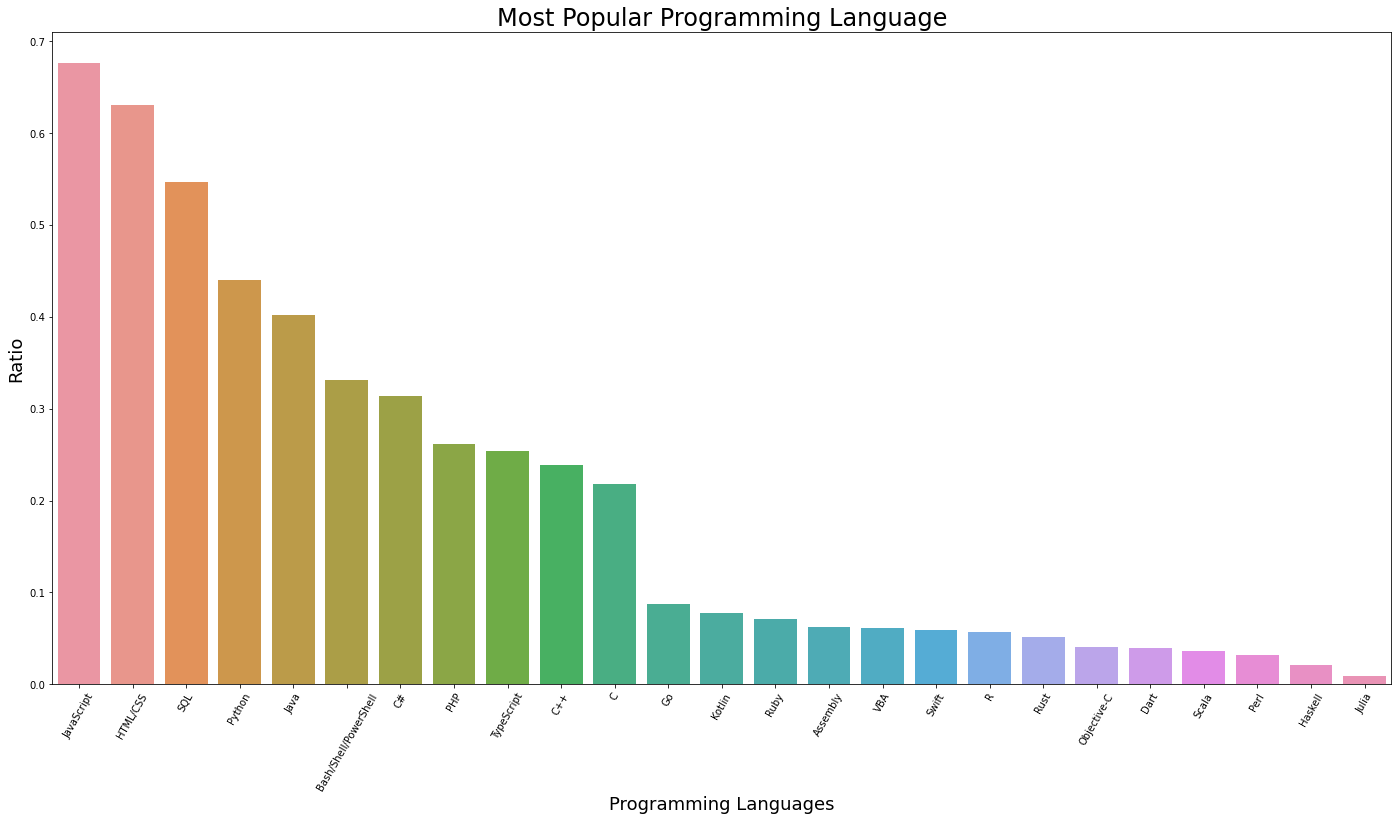

In [131]:
# Programming Language Visualization
plt.figure(figsize=(24,12))
by_lang = sns.barplot(x='language', y='ratio', data=df_lang)
plt.xlabel('Programming Languages', size=18)
plt.ylabel('Ratio', size=18)
plt.title('Most Popular Programming Language', size=24)
for item in by_lang.get_xticklabels():
    item.set_rotation(60)

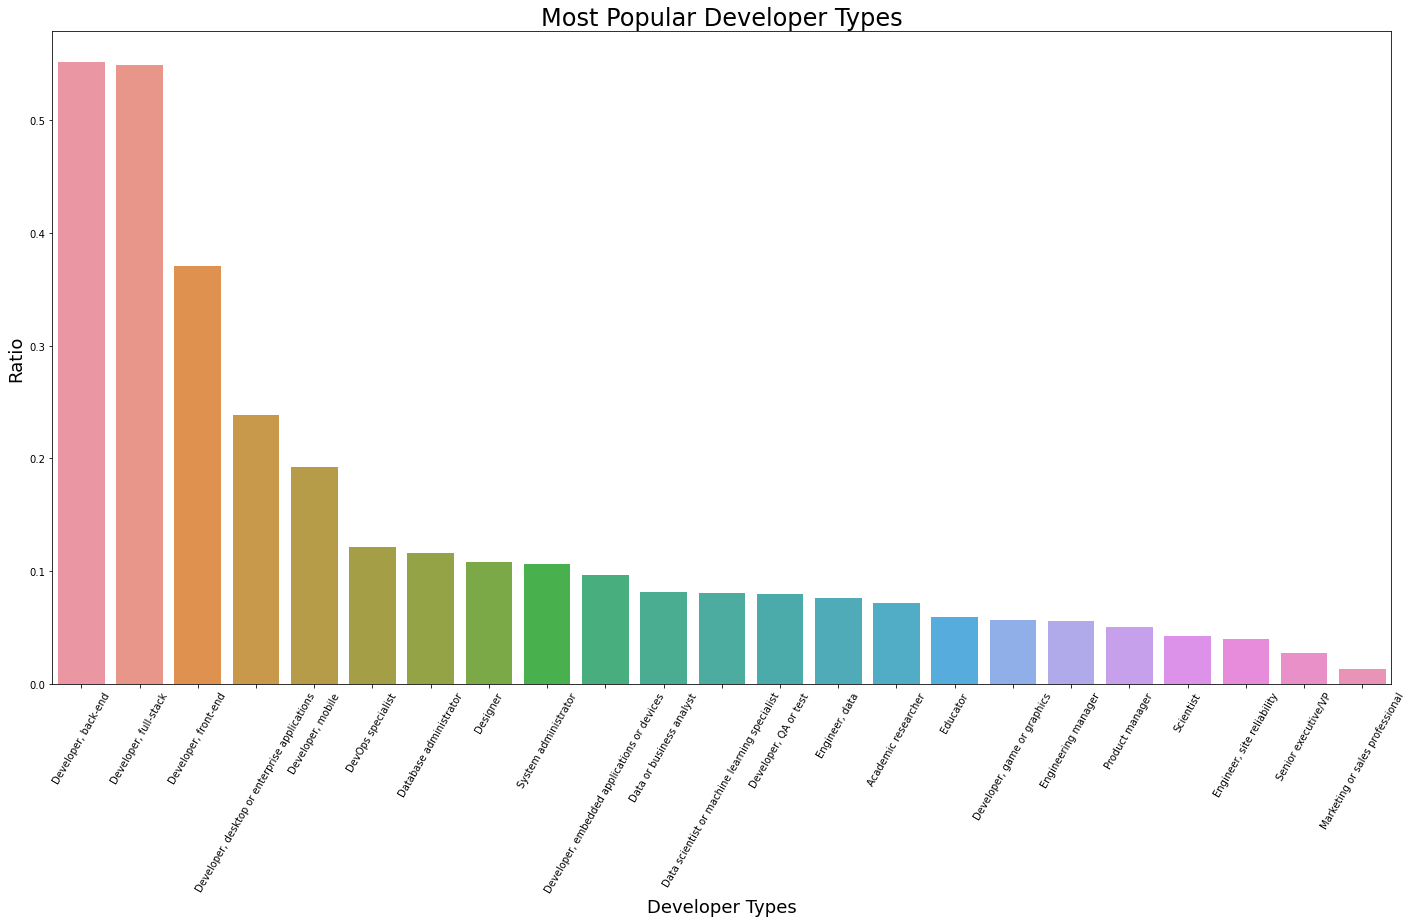

In [132]:
# Developer Types Visualization
plt.figure(figsize=(24,12))
by_dev = sns.barplot(x='devType', y='ratio', data=df_dev)
plt.xlabel('Developer Types', size=18)
plt.ylabel('Ratio', size=18)
plt.title('Most Popular Developer Types', size=24)
for item in by_dev.get_xticklabels():
    item.set_rotation(60)

See more discussions on the analysis on my medium story here: [medium story](https://wisnumulya.medium.com/this-is-how-much-developers-earn-1186505fe096).

## 2. How do different programming languages and developer types relate to salary?

Since the salary might not be in US Dollar, I need use the column `ConvertedComp` in order to approach this question. Let's first see the missing data on the `ConvertedComp` column.

In [37]:
df_res['ConvertedComp'].isnull().mean()

0.4608212717767332

We are seeing about 46% missing values in the column of `ConvertedComp`.

Further, filtering the data to those who only work as developer or to those who code in their work will be appropriate, since it including those who do not may pose unnecesary variability in our data. Let's see the missing data on `MainBranch` column.

In [38]:
df_res['MainBranch'].isnull().mean()

0.004638463567118102

Only 0.46% missing values in the column of `MainBranch`. This might due to it being the first question in the survey and thus, having low rate of missing data.

Regarding the missing values, I am now going to remove the missing values in `ConvertedComp`, since it is the varible whose response I am interested at. While for the missing values of `LanguageWorkedWith` and `DevType`, I will not removing nor impute them, since the people who do not answer the questions (the nan values) might turn out to be important features relating to the salary.

I will also only include those who work as a developer or code in their work, as discusses above.

Then, regarding "massaging the data", I am planning on creating new dataframes with individual values of programming languages and developer types as the columns and salary/compensation as their values, with respondent id's as the index. This would provide me a structure to analyze the descriptive statistics on each of the programming language or developer type and I could use a box-plot visualization to analyze the data.

Here are my high-level plans in approaching this question:
1. Remove the non-developer and the non-coding at work people
2. Remove rows with missing `ConvertedComp` values
3. Create new dataframes
4. Analyze the descriptive data and the visualization

### Remove non-developers and people who don't code at work

In [39]:
df_work = df_res.loc[(df_res['MainBranch'] == 'I am a developer by profession') |\
                    (df_res['MainBranch'] == 'I am not primarily a developer, but I write code sometimes as part of my work')]

In [40]:
# Checking the values
df_work['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am not primarily a developer, but I write code sometimes as part of my work     5502
Name: MainBranch, dtype: int64

### Remove missing values

In [41]:
df_comp_clean = df_work.dropna(subset=['ConvertedComp'], axis=0)

In [42]:
# Checking the result
df_comp_clean['ConvertedComp'].isnull().mean()

0.0

### Creating new dataframes

In [43]:
# Function to be applied for selecting rows with certain string in a value
def is_in(value, string):
    if type(value) == str:
        return string in value
    else:
        return False

In [44]:
# Create dataframe for all programming languages value
df_comp_lang = df_comp_clean.loc[:,['ConvertedComp', 'LanguageWorkedWith']]

for lang in lang_dict.keys():
    # Concatenate a language column with the values of ConvertedComp
    df_comp_lang[lang] = df_comp_lang[df_comp_lang['LanguageWorkedWith'].apply(is_in, string=lang)]['ConvertedComp']

## Concatenate nan for programming language column with values from ConvertedComp
df_comp_lang['nan_language'] = df_comp_lang[df_comp_lang['LanguageWorkedWith'].isnull()]['ConvertedComp']

## Drop the unnecessary columns
df_comp_lang.drop(['ConvertedComp', 'LanguageWorkedWith'], axis=1, inplace=True)

In [45]:
# Observing the dataframe
df_comp_lang

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly,nan_language
Respondent,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,116000.0,NaN,116000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,32315.0,32315.0,NaN,NaN,32315.0,NaN,32315.0,32315.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,40070.0,NaN,40070.0,40070.0,NaN,NaN,NaN,NaN,40070.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,14268.0,14268.0,NaN,NaN,NaN,NaN,NaN,14268.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,38916.0,NaN,NaN,38916.0,NaN,NaN,38916.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65619,NaN,984.0,984.0,NaN,NaN,NaN,NaN,NaN,984.0,984.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19428.0
65629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0


In [46]:
# Create dataframe for all developer types value
df_comp_dev = df_comp_clean.loc[:,['ConvertedComp', 'DevType']]

for dev in dev_dict.keys():
    # Concatenate a developer type column with values from ConvertedComp
    df_comp_dev[dev] = df_comp_dev[df_comp_dev['DevType'].apply(is_in, string=dev)]['ConvertedComp']

## Concatenate nan for developer type column with values from ConvertedComp
df_comp_dev['nan_devtype'] = df_comp_dev[df_comp_dev['DevType'].isnull()]['ConvertedComp']

## Drop the unnecessary columns
df_comp_dev.drop(['ConvertedComp', 'DevType'], axis=1, inplace=True)

In [47]:
# Observing the dataframe
df_comp_dev

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional,nan_devtype
Respondent,,,,,,,,,,,,,,,,,,,,,
8,116000.0,NaN,NaN,NaN,NaN,116000.0,NaN,NaN,116000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,32315.0,32315.0,NaN,NaN,NaN,NaN,NaN,NaN,32315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,40070.0,NaN,NaN,NaN,40070.0,40070.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,14268.0,14268.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,38916.0,NaN,38916.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65619,NaN,NaN,NaN,NaN,NaN,984.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,984.0,NaN,NaN,NaN,NaN,NaN,NaN
65625,NaN,NaN,NaN,NaN,NaN,NaN,19428.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65629,NaN,200.0,NaN,NaN,200.0,200.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyzing the data

In [48]:
# Observing the descriptive statistics of the dataframe
df_comp_lang.describe().T.sort_values('50%', ascending=False) # Sort by median

,count,mean,std,min,25%,50%,75%,max
Perl,1072.0,155724.990672,309590.381444,0.0,44100.00,76131.5,130000.00,2000000.0
Scala,1377.0,145749.003631,284702.527990,0.0,44028.00,75669.0,135000.00,2000000.0
Go,3322.0,134861.133955,253148.980067,0.0,40070.00,74034.0,129718.00,2000000.0
Rust,1628.0,138282.399877,251353.924808,0.0,43817.50,74000.0,126188.00,2000000.0
Ruby,2681.0,143067.032451,293758.396962,0.0,37834.00,71093.0,125000.00,2000000.0
R,5602.0,132975.636023,270959.132507,0.0,36390.00,66805.0,118000.00,2000000.0
Bash/Shell/PowerShell,12514.0,123621.343455,250815.202507,0.0,37816.00,65052.0,111000.00,2000000.0
Objective-C,1406.0,132170.721195,267865.604105,0.0,32331.00,63654.0,120000.00,2000000.0
Haskell,564.0,116999.764184,222556.749135,0.0,35535.00,60130.5,117187.75,2000000.0
Julia,241.0,170101.531120,361732.290443,0.0,34000.00,59454.0,115452.00,2000000.0


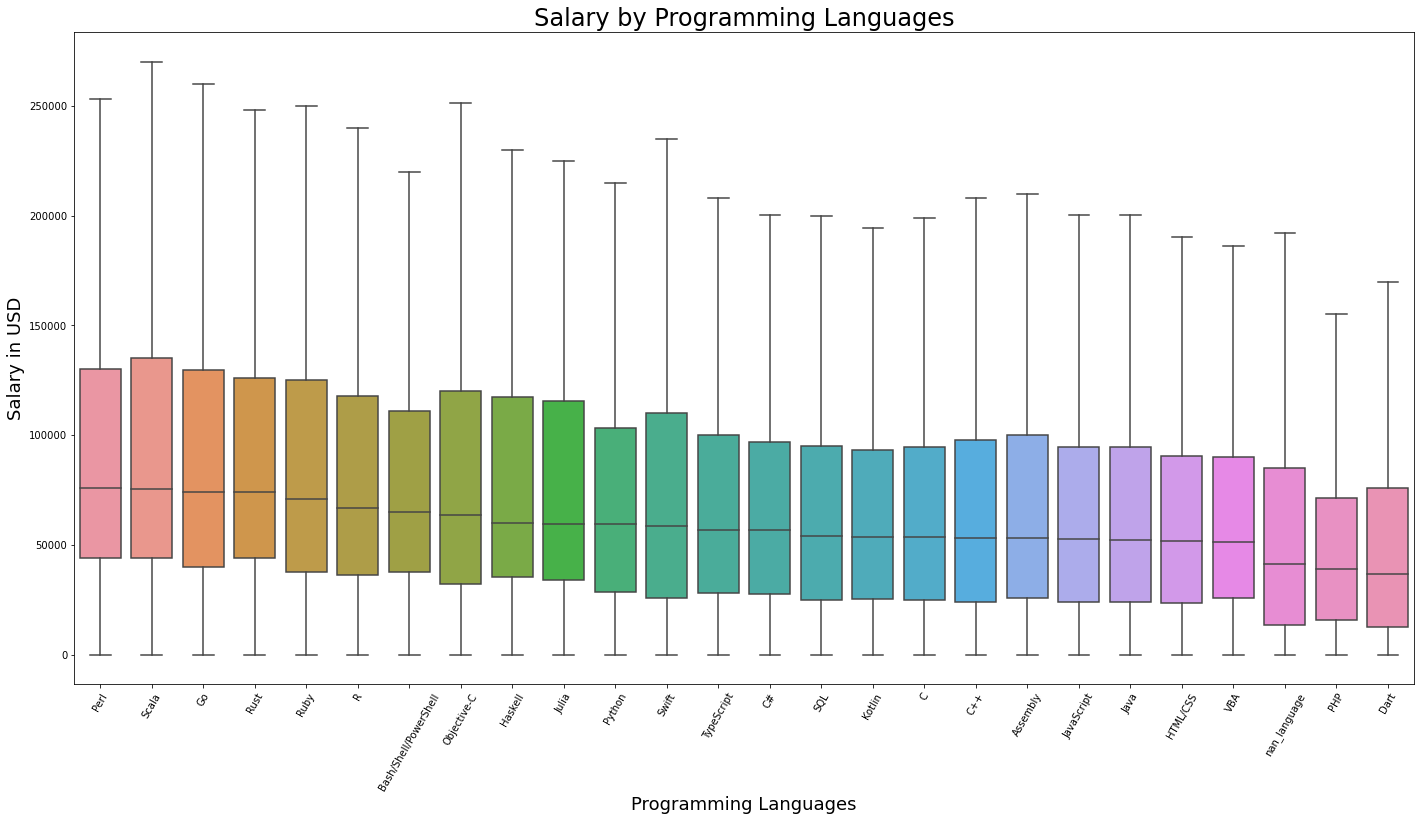

In [49]:
# Create sorted dataframe by the median
df_comp_lang_sorted = df_comp_lang[df_comp_lang.median().sort_values(ascending=False).index]

# Visualize with boxplot
plt.figure(figsize=(24,12))
boxplot_lang = sns.boxplot(data=df_comp_lang_sorted, orient='v', showfliers=False)
plt.xlabel('Programming Languages', size=18)
plt.ylabel('Salary in USD', size=18)
plt.title('Salary by Programming Languages', size=24)
for item in boxplot_lang.get_xticklabels():
    item.set_rotation(60)

In [50]:
# Observing the descriptive statistics of the dataframe
df_comp_dev.describe().T.sort_values('50%', ascending=False) # Sort by median

,count,mean,std,min,25%,50%,75%,max
Engineering manager,1922.0,152102.136316,258064.342621,0.0,51039.00,91883.0,150000.00,2000000.0
Senior executive/VP,792.0,155010.026515,263288.978543,0.0,45450.00,90000.0,162147.00,2000000.0
"Engineer, site reliability",1454.0,147103.356946,278423.648556,0.0,42003.00,80000.0,135734.75,2000000.0
DevOps specialist,4627.0,117256.690296,234175.009469,0.0,38333.50,68068.0,110000.00,2000000.0
nan_devtype,389.0,140053.125964,242039.466719,0.0,34591.00,67215.0,122000.00,2000000.0
"Engineer, data",2561.0,125454.218274,269624.824677,0.0,30732.00,64859.0,112500.00,2000000.0
Product manager,1634.0,120308.004896,262889.931714,0.0,27567.50,59000.0,103408.00,2000000.0
Data scientist or machine learning specialist,2619.0,123911.183276,279460.176000,0.0,25902.00,58000.0,104806.50,2000000.0
Scientist,1376.0,112595.875727,240133.637265,0.0,29958.00,56755.5,98548.00,2000000.0
"Developer, embedded applications or devices",3204.0,116052.122971,252164.166334,0.0,27025.00,56579.5,100000.00,2000000.0


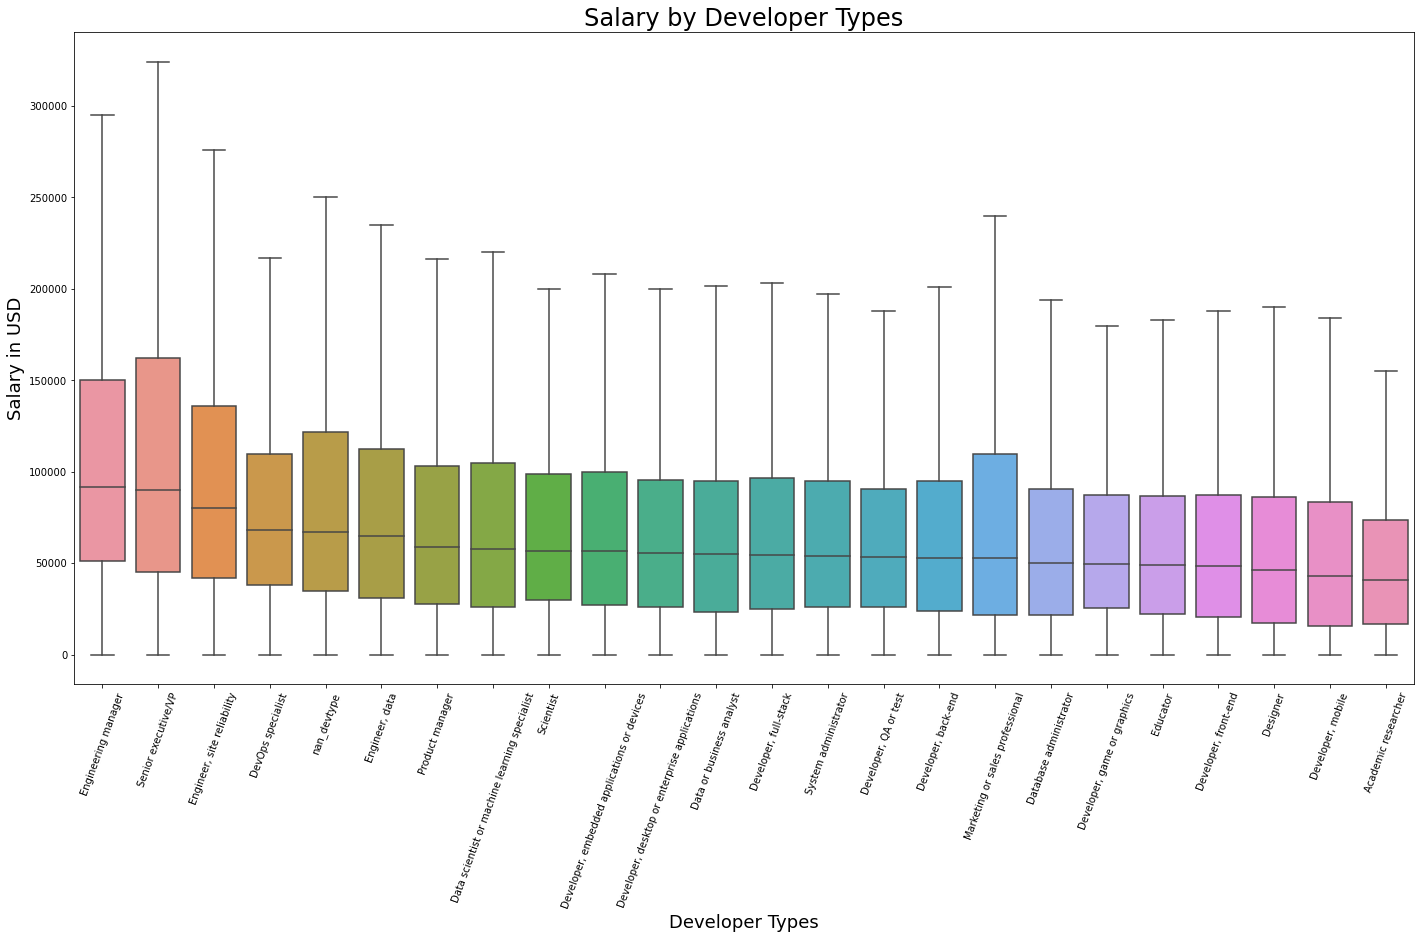

In [135]:
# Create sorted dataframe by the median
df_comp_dev_sorted = df_comp_dev[df_comp_dev.median().sort_values(ascending=False).index]

# Visualize with boxplot
plt.figure(figsize=(24,12))
boxplot_dev = sns.boxplot(data=df_comp_dev_sorted, orient='v', showfliers=False)
plt.xlabel('Developer Types', size=18)
plt.ylabel('Salary in USD', size=18)
plt.title('Salary by Developer Types', size=24)
for item in boxplot_dev.get_xticklabels():
    item.set_rotation(70)

We could see from the above figure that the people who do not answer the `DevType` question have quite a high salary level and this might pose as an interesting further study as to what other qualities or features associated with these people.

You could see more of my analysis on my medium story here: [medium story](https://wisnumulya.medium.com/this-is-how-much-developers-earn-1186505fe096).

## 3. Does education level pose a bias in result?

Let's first see the missing values in the `EdLevel` column.

In [52]:
df_res['EdLevel'].isnull().mean()

0.10905819022354601

In [53]:
# Revisit its values
df_res['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

So there are about 11% missing values in the `EdLevel` column.

Also, I will further group them into either a higher education group (Master's, Doctoral, and Professional Degree) and a group who do not have one.

In answering this question, I will also break up the problem into two parts. The first one is regarding the popularity of either programming language or developer types and the second one is regarding the relationship with the salary.

In the first part, I will approach the question by analyzing the difference between the percentage of popularity in the two group of higher education.

In the second one, I will approach the question by analysing the descriptive statistics and the boxplot between the two groups in their relation to salary.

Here are my higher-level plan:
1. Create different dataframes for each group
2. Create dataframes as in question 1 above for the two groups
3. Cretae dataframes as in question 2 above for the two groups
4. Analyze the data

### Create dataframes for EdLevel Groups

In [54]:
# Creating function to be applied to create a new HigherEd column for grouping
def higher_ed(ed_str):
    if ed_str in ("Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",\
                         "Other doctoral degree (Ph.D., Ed.D., etc.)",\
                         "Professional degree (JD, MD, etc.)"):
        return 1
    else:
        return 0

In [55]:
# Creating new dataframes
df_high_ed = df_res.copy()
df_high_ed['HigherEd'] = df_res['EdLevel'].apply(higher_ed)

In [56]:
# Checking the dataframe
df_high_ed.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,HigherEd
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,1
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,0
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,0
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4,1
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8,0


In [57]:
# Checking the percentage of people with HigherEd
df_high_ed['HigherEd'].mean()

0.2420378213183165

In [58]:
# Grouping the dataframes
df_ed1 = df_high_ed.loc[df_high_ed['HigherEd'] == 1]
df_ed0 = df_high_ed.loc[df_high_ed['HigherEd'] == 0]

In [59]:
# Checking the dataframes
print(df_ed1['HigherEd'].mean())
print(df_ed0['HigherEd'].mean())

1.0
0.0


### Creating dataframes as in question 1

In [60]:
# Clean language data from NaN
df_lang_clean_ed1 = df_ed1.loc[df_ed1['LanguageWorkedWith'].isnull() == False]
df_lang_clean_ed0 = df_ed0.loc[df_ed0['LanguageWorkedWith'].isnull() == False]

# Checking whether it is clean
print(df_lang_clean_ed1['LanguageWorkedWith'].isnull().mean())
print(df_lang_clean_ed0['LanguageWorkedWith'].isnull().mean())

0.0
0.0


In [61]:
# Clean devtype data from NaN
df_dev_clean_ed1 = df_ed1.loc[df_ed1['DevType'].isnull() == False]
df_dev_clean_ed0 = df_ed0.loc[df_ed0['DevType'].isnull() == False]

# Checking whether it is clean
print(df_dev_clean_ed1['DevType'].isnull().mean())
print(df_dev_clean_ed0['DevType'].isnull().mean())

0.0
0.0


In [62]:
# Creating a list of LanguageWorkedWith values to be ungrouped
lang_list_ed1 = list(df_lang_clean_ed1['LanguageWorkedWith'])
lang_list_ed0 = list(df_lang_clean_ed0['LanguageWorkedWith'])

# Creating a dictionary to count each individual language and to create a new dataframe
lang_dict_ed1 = {}
lang_dict_ed0 = {}

# Parse through each LanguageWorkedWith values in ed1
for lang_val in lang_list_ed1:
    split_vals = lang_val.split(';')
    for lang in split_vals:
        if lang in lang_dict_ed1:
            lang_dict_ed1[lang] += 1
        else:
            lang_dict_ed1[lang] = 1
            
# Parse through each LanguageWorkedWith values in ed0
for lang_val in lang_list_ed0:
    split_vals = lang_val.split(';')
    for lang in split_vals:
        if lang in lang_dict_ed0:
            lang_dict_ed0[lang] += 1
        else:
            lang_dict_ed0[lang] = 1

In [63]:
# Checking the dictionaries
print(lang_dict_ed1)
print(lang_dict_ed0)

{'C#': 4054, 'HTML/CSS': 7754, 'JavaScript': 8701, 'PHP': 2961, 'Java': 5657, 'Python': 7008, 'SQL': 7684, 'Bash/Shell/PowerShell': 5353, 'Kotlin': 1123, 'C': 3159, 'C++': 3603, 'TypeScript': 3348, 'Dart': 416, 'R': 1515, 'VBA': 961, 'Scala': 772, 'Ruby': 973, 'Assembly': 827, 'Objective-C': 639, 'Perl': 599, 'Swift': 822, 'Go': 1173, 'Haskell': 312, 'Rust': 715, 'Julia': 221}
{'JavaScript': 30121, 'Swift': 2575, 'Objective-C': 1701, 'Python': 18279, 'HTML/CSS': 28427, 'Ruby': 3073, 'SQL': 23729, 'Java': 17417, 'C#': 13987, 'PHP': 12046, 'C': 9328, 'TypeScript': 11230, 'Bash/Shell/PowerShell': 13627, 'Kotlin': 3345, 'R': 1773, 'VBA': 2538, 'Perl': 1197, 'Scala': 1280, 'C++': 10104, 'Go': 3865, 'Haskell': 910, 'Rust': 2214, 'Dart': 1864, 'Julia': 298, 'Assembly': 2726}


In [64]:
# Creating a list of DevType values to be ungrouped
dev_list_ed1 = list(df_dev_clean_ed1['DevType'])
dev_list_ed0 = list(df_dev_clean_ed0['DevType'])

# Creating a dictionary to count each individual language and to create a new dataframe
dev_dict_ed1 = {}
dev_dict_ed0 = {}

# Parse through each DevType values in ed1
for dev_val in dev_list_ed1:
    split_vals = dev_val.split(';')
    for devtype in split_vals:
        if devtype in dev_dict_ed1:
            dev_dict_ed1[devtype] += 1
        else:
            dev_dict_ed1[devtype] = 1
            
# Parse through each LanguageWorkedWith values in ed0
for dev_val in dev_list_ed0:
    split_vals = dev_val.split(';')
    for devtype in split_vals:
        if devtype in dev_dict_ed0:
            dev_dict_ed0[devtype] += 1
        else:
            dev_dict_ed0[devtype] = 1

In [65]:
# Checking the dictionaries
print(dev_dict_ed1)
print(dev_dict_ed0)

{'Developer, desktop or enterprise applications': 3318, 'Developer, full-stack': 6892, 'Database administrator': 1308, 'Developer, mobile': 2275, 'Developer, back-end': 7380, 'Academic researcher': 2031, 'Developer, front-end': 3974, 'Data or business analyst': 1343, 'Product manager': 807, 'Developer, embedded applications or devices': 1514, 'Developer, game or graphics': 679, 'Data scientist or machine learning specialist': 2108, 'Developer, QA or test': 979, 'Engineer, data': 1498, 'Scientist': 1358, 'Designer': 1132, 'Senior executive/VP': 482, 'Educator': 1159, 'System administrator': 1208, 'Engineering manager': 980, 'DevOps specialist': 1723, 'Engineer, site reliability': 481, 'Marketing or sales professional': 155}
{'Developer, full-stack': 20233, 'Developer, mobile': 7207, 'Designer': 4189, 'Developer, front-end': 14322, 'Developer, back-end': 19848, 'Developer, QA or test': 2968, 'DevOps specialist': 4246, 'Developer, desktop or enterprise applications': 8466, 'Developer, gam

In [66]:
# Creating LanguageWorkedWith dataframe with its count
## For ed1
df_lang_ed1 = pd.DataFrame(pd.Series(lang_dict_ed1)).reset_index()
df_lang_ed1.columns = ['language', 'count']
df_lang_ed1.sort_values('count', ascending=False, inplace=True) # Sort based on count
## For ed0
df_lang_ed0 = pd.DataFrame(pd.Series(lang_dict_ed0)).reset_index()
df_lang_ed0.columns = ['language', 'count']
df_lang_ed0.sort_values('count', ascending=False, inplace=True) # Sort based on count

In [67]:
# Creating DevType dataframe with its count
## For ed1
df_dev_ed1 = pd.DataFrame(pd.Series(dev_dict_ed1)).reset_index()
df_dev_ed1.columns = ['devtype', 'count']
df_dev_ed1.sort_values('count', ascending=False, inplace=True) # Sort based on count
## For ed0
df_dev_ed0 = pd.DataFrame(pd.Series(dev_dict_ed0)).reset_index()
df_dev_ed0.columns = ['devtype', 'count']
df_dev_ed0.sort_values('count', ascending=False, inplace=True) # Sort based on count

In [68]:
# Adding ratio to each dataframes
df_lang_ed1['ratio'] = df_lang_ed1['count'] / df_lang_clean_ed1.shape[0]
df_lang_ed0['ratio'] = df_lang_ed0['count'] / df_lang_clean_ed0.shape[0]
df_dev_ed1['ratio'] = df_dev_ed1['count'] / df_dev_clean_ed1.shape[0]
df_dev_ed0['ratio'] = df_dev_ed0['count'] / df_dev_clean_ed0.shape[0]

In [69]:
# Setting the language as index, drop the count, and merge the two education groups
lang_ed1_ratio = df_lang_ed1.set_index('language').drop('count', axis=1)
lang_ed0_ratio = df_lang_ed0.set_index('language').drop('count', axis=1)
lang_ed_df = pd.merge(lang_ed1_ratio, lang_ed0_ratio, left_index=True, right_index=True)
lang_ed_df.columns = ['ed1_ratio', 'ed0_ratio']

In [70]:
# Setting the devtype as index, drop the count, and merge the two education groups
dev_ed1_ratio = df_dev_ed1.set_index('devtype').drop('count', axis=1)
dev_ed0_ratio = df_dev_ed0.set_index('devtype').drop('count', axis=1)
dev_ed_df = pd.merge(dev_ed1_ratio, dev_ed0_ratio, left_index=True, right_index=True)
dev_ed_df.columns = ['ed1_ratio', 'ed0_ratio']

In [71]:
# Adding the column of the difference between the two groups ratio
lang_ed_df['diff_higherEd_ratio'] = lang_ed_df['ed1_ratio'] - lang_ed_df['ed0_ratio']
dev_ed_df['diff_higherEd_ratio'] = dev_ed_df['ed1_ratio'] - dev_ed_df['ed0_ratio']

### Analyzing the prevalence bias

In [72]:
lang_ed_df.style.bar(subset=['diff_higherEd_ratio'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed1_ratio,ed0_ratio,diff_higherEd_ratio
language,,,
JavaScript,0.600276,0.702400,-0.102124
HTML/CSS,0.534943,0.662897,-0.127954
SQL,0.530114,0.553343,-0.023229
Python,0.483477,0.426253,0.057224
Java,0.390273,0.406152,-0.015879
Bash/Shell/PowerShell,0.369300,0.317772,0.051528
C#,0.279683,0.326167,-0.046484
C++,0.248568,0.235618,0.012951
TypeScript,0.230976,0.261875,-0.030899


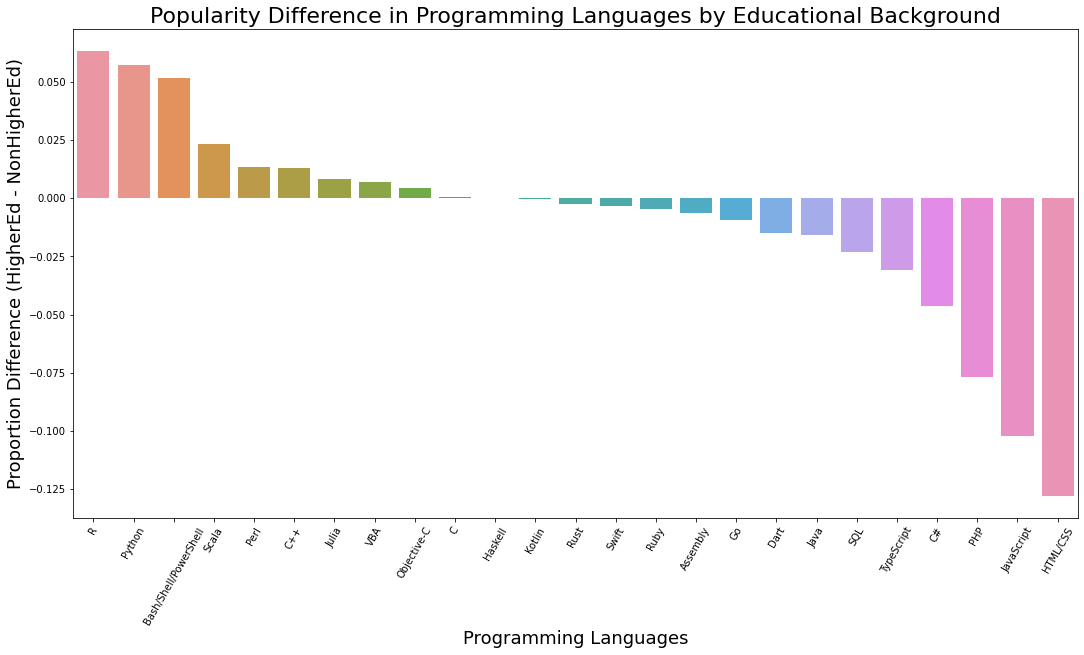

In [136]:
# Visualizing the difference using Seaborn
lang_ed_df_melt = pd.melt(lang_ed_df.reset_index().drop(['ed1_ratio', 'ed0_ratio'], axis=1), 'diff_higherEd_ratio')
lang_ed_df_melt.sort_values('diff_higherEd_ratio', ascending=False, inplace=True)

plt.figure(figsize=(18,9))
barplot_lang_sal = sns.barplot(data=lang_ed_df_melt, x='value', y='diff_higherEd_ratio')
plt.xlabel('Programming Languages', size=18)
plt.ylabel('Proportion Difference (HigherEd - NonHigherEd)', size=18)
plt.title('Popularity Difference in Programming Languages by Educational Background', size=22)
for item in barplot_lang_sal.get_xticklabels():
    item.set_rotation(60)

In [108]:
dev_ed_df.style.bar(subset=['diff_higherEd_ratio'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed1_ratio,ed0_ratio,diff_higherEd_ratio
devtype,,,
"Developer, back-end",0.513606,0.567070,-0.053464
"Developer, full-stack",0.479644,0.578069,-0.098426
"Developer, front-end",0.276568,0.409188,-0.132621
"Developer, desktop or enterprise applications",0.230914,0.241879,-0.010965
"Developer, mobile",0.158327,0.205908,-0.047581
Data scientist or machine learning specialist,0.146705,0.053713,0.092992
Academic researcher,0.141346,0.043456,0.097890
DevOps specialist,0.119911,0.121311,-0.001400
"Developer, embedded applications or devices",0.105366,0.092455,0.012911


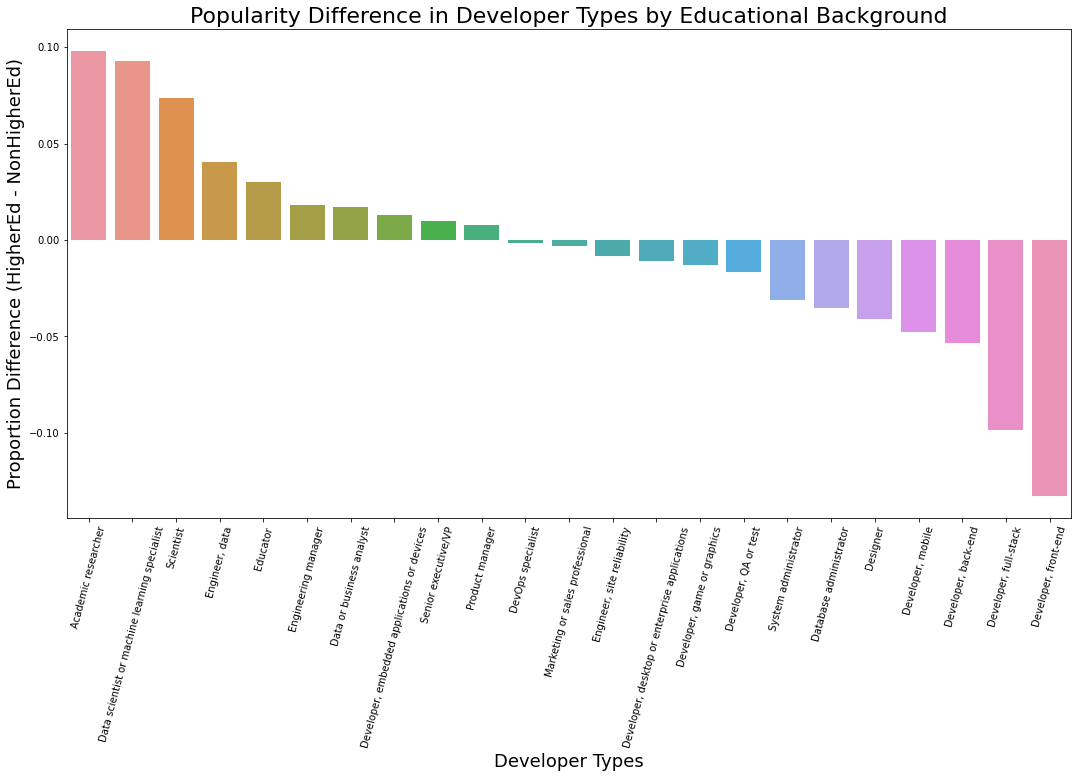

In [140]:
# Visualizing the difference using Seaborn
dev_ed_df_melt = pd.melt(dev_ed_df.reset_index().drop(['ed1_ratio', 'ed0_ratio'], axis=1), 'diff_higherEd_ratio')
dev_ed_df_melt.sort_values('diff_higherEd_ratio', ascending=False, inplace=True)

plt.figure(figsize=(18,9))
barplot_lang_sal = sns.barplot(data=dev_ed_df_melt, x='value', y='diff_higherEd_ratio')
plt.xlabel('Developer Types', size=18)
plt.ylabel('Proportion Difference (HigherEd - NonHigherEd)', size=18)
plt.title('Popularity Difference in Developer Types by Educational Background', size=22)
for item in barplot_lang_sal.get_xticklabels():
    item.set_rotation(75)

### Creating the dataframes as in question 2

In [110]:
# Creating function to be applied to question 2 dataframes
def higher_ed_comp(ed_str):
    if ed_str in ("Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",\
                         "Other doctoral degree (Ph.D., Ed.D., etc.)",\
                         "Professional degree (JD, MD, etc.)"):
        return 'Ed 1'
    else:
        return 'Ed 0'

In [111]:
# Creating new dataframes
df_comp_lang_ed = df_comp_lang.copy()
df_comp_lang_ed = df_comp_lang_ed[df_comp_lang_ed.median().sort_values(ascending=False).index] # Sort based on median
df_comp_lang_ed['HigherEd'] = df_comp_clean['EdLevel'].apply(higher_ed_comp)

df_comp_dev_ed = df_comp_dev.copy()
df_comp_dev_ed = df_comp_dev_ed[df_comp_dev_ed.median().sort_values(ascending=False).index] # Sort based on median
df_comp_dev_ed['HigherEd'] = df_comp_clean['EdLevel'].apply(higher_ed_comp)

In [112]:
df_comp_lang_ed

,Perl,Scala,Go,Rust,Ruby,R,Bash/Shell/PowerShell,Objective-C,Haskell,Julia,...,C++,Assembly,JavaScript,Java,HTML/CSS,VBA,nan_language,PHP,Dart,HigherEd
Respondent,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ed 0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32315.0,32315.0,32315.0,NaN,NaN,NaN,NaN,Ed 1
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40070.0,40070.0,NaN,NaN,NaN,NaN,NaN,Ed 0
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14268.0,14268.0,14268.0,NaN,NaN,NaN,NaN,Ed 0
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38916.0,38916.0,NaN,NaN,NaN,NaN,NaN,Ed 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,984.0,984.0,984.0,NaN,NaN,984.0,NaN,Ed 0
65625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19428.0,NaN,NaN,Ed 0
65629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,Ed 0


### Analyzing the data

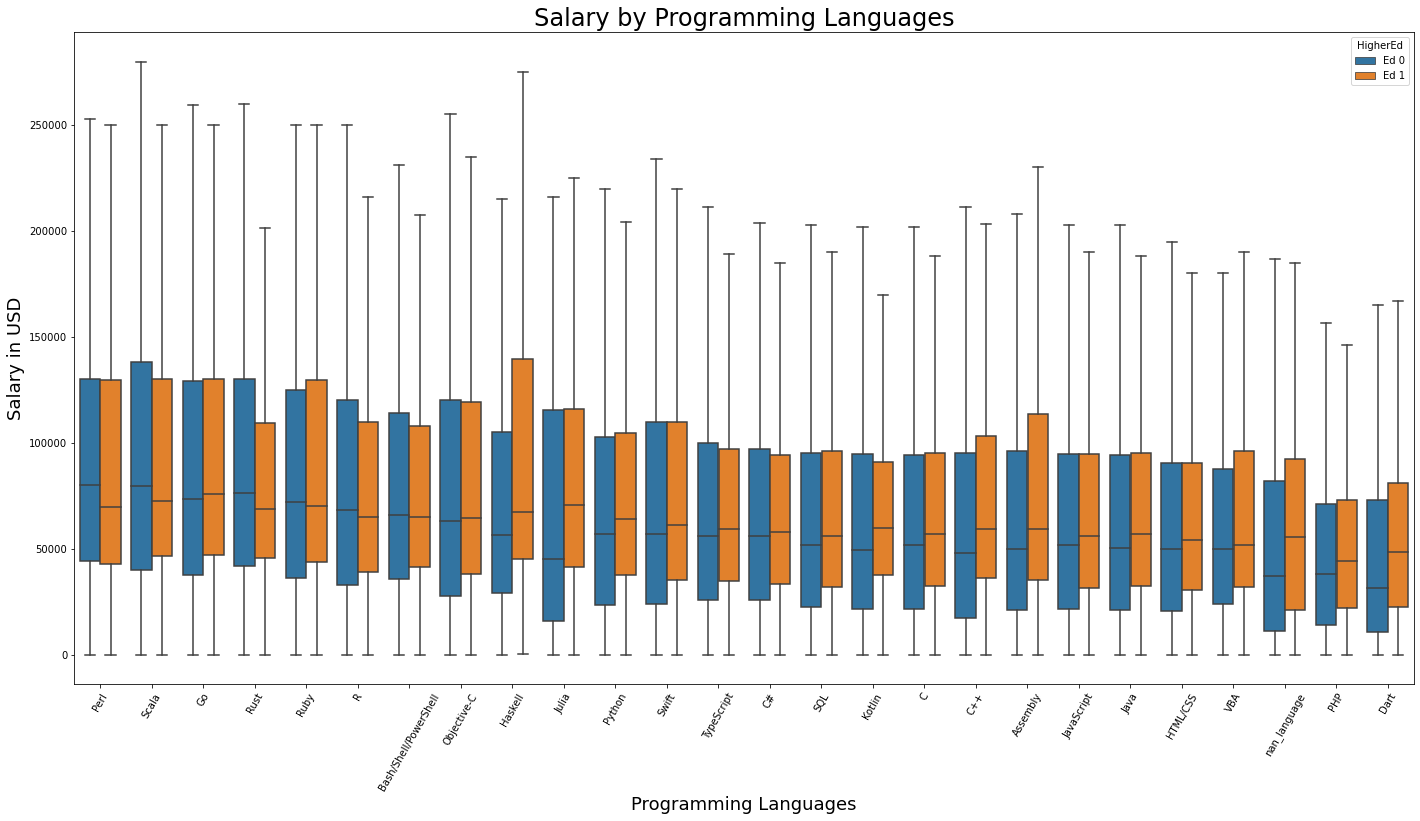

In [113]:
# Visualize with boxplot
## Melt the dataframe as to display hue based on HigherEd
df_com_lang_ed_melt = pd.melt(df_comp_lang_ed, 'HigherEd', var_name="language", value_name="salary")
plt.figure(figsize=(24,12))
boxplot_lang = sns.boxplot(x="language", hue="HigherEd", y="salary", data=df_com_lang_ed_melt, orient='v', showfliers=False)
plt.xlabel('Programming Languages', size=18)
plt.ylabel('Salary in USD', size=18)
plt.title('Salary by Programming Languages', size=24)
for item in boxplot_lang.get_xticklabels():
    item.set_rotation(60)

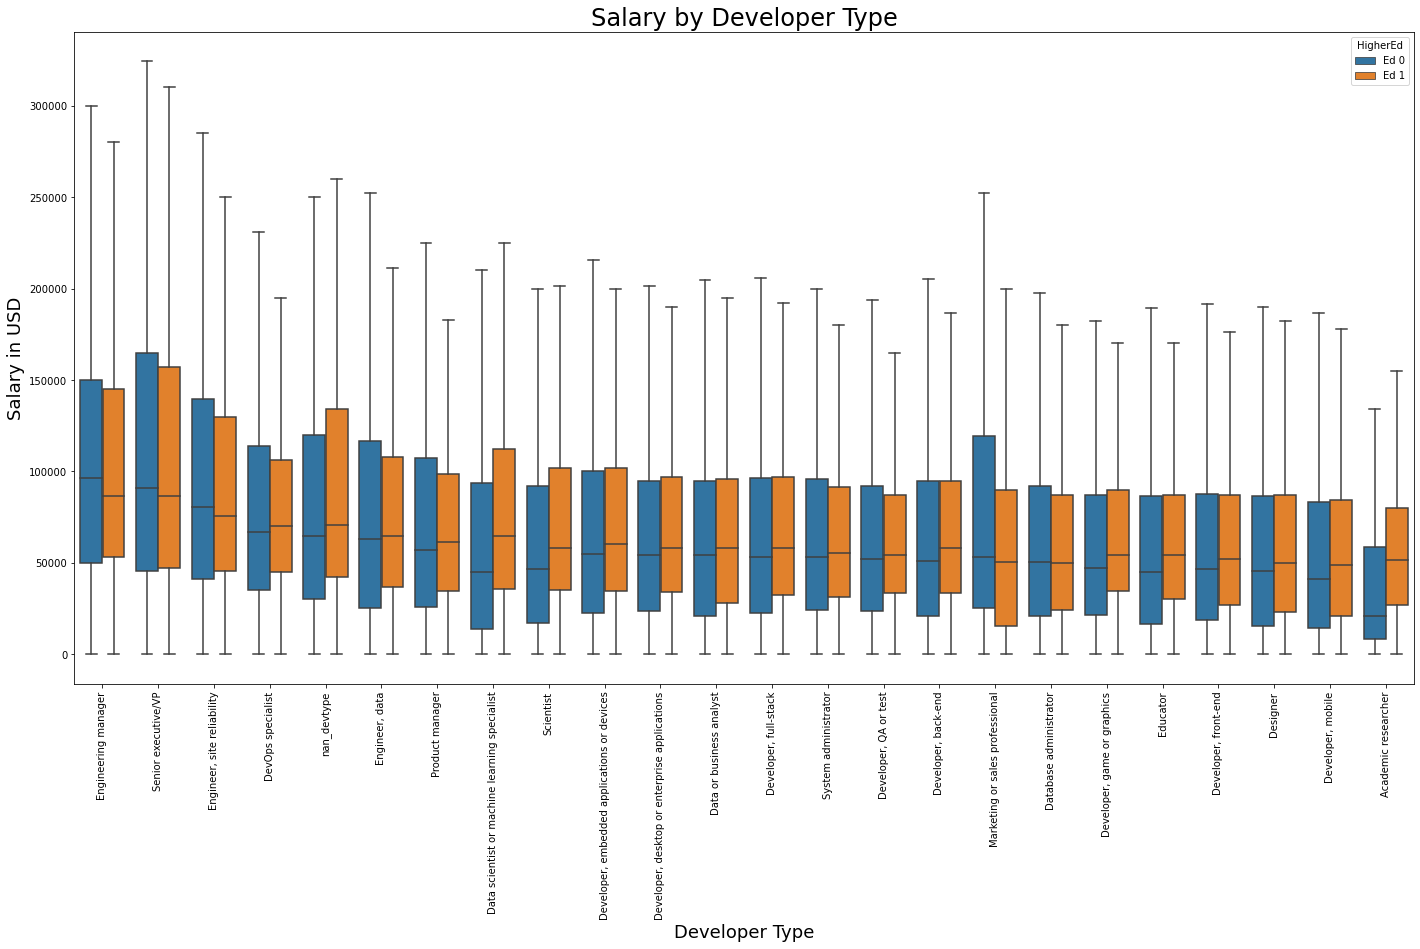

In [114]:
## Melt the dataframe as to display hue based on HigherEd
df_com_dev_ed_melt = pd.melt(df_comp_dev_ed, 'HigherEd', var_name="devtype", value_name="salary")
plt.figure(figsize=(24,12))
boxplot_dev = sns.boxplot(x="devtype", hue="HigherEd", y="salary", data=df_com_dev_ed_melt, orient='v', showfliers=False)
plt.xlabel('Developer Type', size=18)
plt.ylabel('Salary in USD', size=18)
plt.title('Salary by Developer Type', size=24)
for item in boxplot_dev.get_xticklabels():
    item.set_rotation(90)

There are too much visualization to be useful from the above figures. Let's make it easier by seeing the ratio of the difference in median, analogous to what I do for the prevalence case above.

In [115]:
# For the programming language dataframe
df_comp_lang_ed_diff = df_comp_lang_ed.groupby('HigherEd').median().T.sort_values('Ed 1', ascending=False)
df_comp_lang_ed_diff['Diff_Ed_Median_Ratio'] = (df_comp_lang_ed_diff['Ed 1'] - df_comp_lang_ed_diff['Ed 0']) / df_comp_lang_ed_diff['Ed 1']
df_comp_lang_ed_diff.style.bar(subset=['Diff_Ed_Median_Ratio'], align='mid', color=['#d65f5f', '#5fba7d'])

HigherEd,Ed 0,Ed 1,Diff_Ed_Median_Ratio
Go,73507.000000,75669.000000,0.028572
Scala,79452.000000,72636.000000,-0.093838
Julia,44915.000000,70692.000000,0.364638
Ruby,72000.000000,70000.000000,-0.028571
Perl,79896.000000,69809.000000,-0.144494
Rust,76127.000000,68852.000000,-0.105661
Haskell,56499.500000,67448.000000,0.162325
R,68102.000000,64859.000000,-0.050001
Bash/Shell/PowerShell,66041.000000,64859.000000,-0.018224
Objective-C,63069.000000,64630.000000,0.024153


In [116]:
# The mean difference between the two education group
df_comp_lang_ed_diff['Diff_Ed_Median_Ratio'].mean()

0.08506384501547284

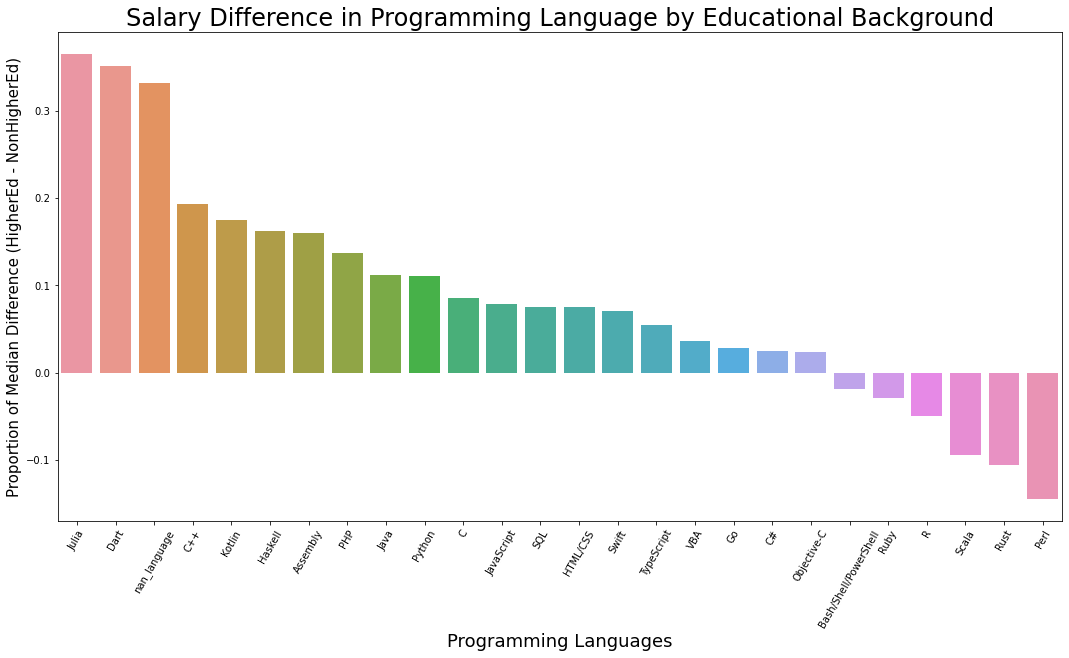

In [142]:
# Visualizing the difference using Seaborn
df_comp_lang_ed_diff_melt = pd.melt(df_comp_lang_ed_diff.reset_index().drop(['Ed 0', 'Ed 1'], axis=1), 'Diff_Ed_Median_Ratio')
df_comp_lang_ed_diff_melt.sort_values('Diff_Ed_Median_Ratio', ascending=False, inplace=True)

plt.figure(figsize=(18,9))
barplot_lang_sal = sns.barplot(data=df_comp_lang_ed_diff_melt, x='value', y='Diff_Ed_Median_Ratio')
plt.xlabel('Programming Languages', size=18)
plt.ylabel('Proportion of Median Difference (HigherEd - NonHigherEd)', size=15)
plt.title('Salary Difference in Programming Language by Educational Background', size=24)
for item in barplot_lang_sal.get_xticklabels():
    item.set_rotation(60)

In [124]:
# For the developer type dataframe
df_comp_dev_ed_diff = df_comp_dev_ed.groupby('HigherEd').median().T.sort_values('Ed 1', ascending=False)
df_comp_dev_ed_diff['Diff_Ed_Median_Ratio'] = (df_comp_dev_ed_diff['Ed 1'] - df_comp_dev_ed_diff['Ed 0']) / df_comp_dev_ed_diff['Ed 1']
df_comp_dev_ed_diff.style.bar(subset=['Diff_Ed_Median_Ratio'], align='mid', color=['#d65f5f', '#5fba7d'])

HigherEd,Ed 0,Ed 1,Diff_Ed_Median_Ratio
Engineering manager,96486.000000,86478.000000,-0.115729
Senior executive/VP,90804.000000,86478.000000,-0.050024
"Engineer, site reliability",80424.000000,75669.000000,-0.062839
nan_devtype,64752.000000,70566.500000,0.082397
DevOps specialist,67000.000000,70000.000000,0.042857
"Engineer, data",63000.000000,64860.000000,0.028677
Data scientist or machine learning specialist,44832.000000,64630.000000,0.306328
Product manager,57156.000000,61368.000000,0.068635
"Developer, embedded applications or devices",55000.000000,60086.500000,0.084653
"Developer, full-stack",53184.000000,58373.000000,0.088894


In [125]:
# The mean difference between the two education group
df_comp_dev_ed_diff['Diff_Ed_Median_Ratio'].mean()

0.0912686610454967

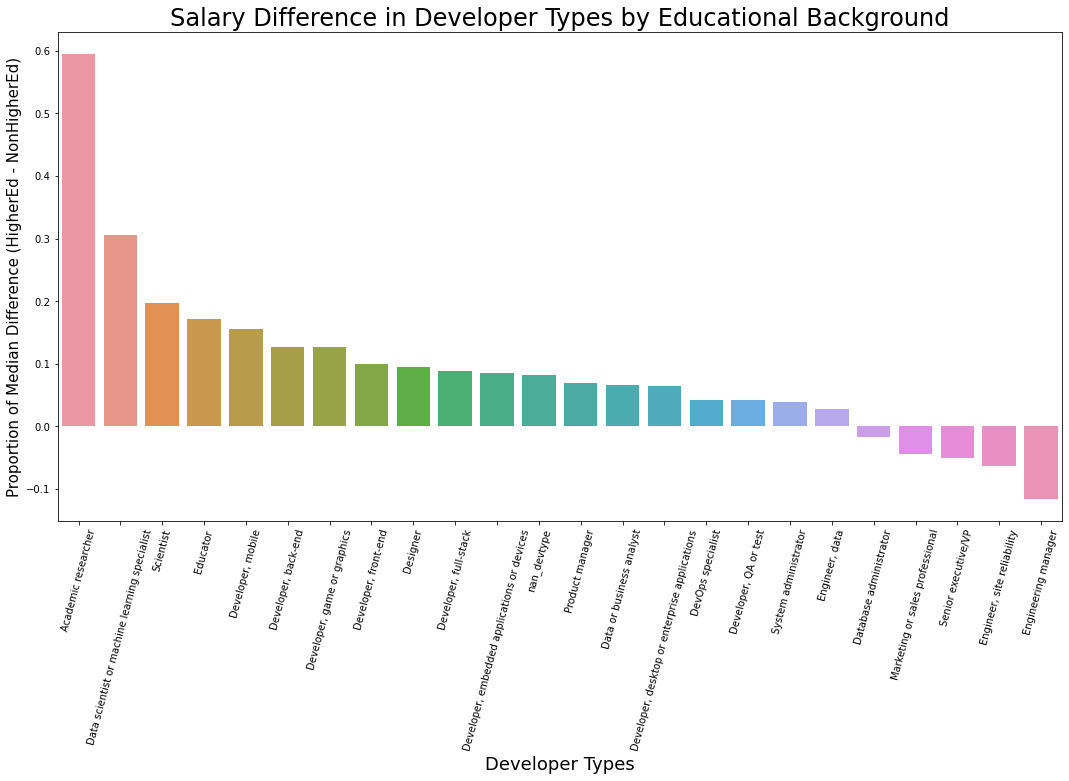

In [145]:
# Visualizing the difference using Seaborn
df_comp_dev_ed_diff_melt = pd.melt(df_comp_dev_ed_diff.reset_index().drop(['Ed 0', 'Ed 1'], axis=1), 'Diff_Ed_Median_Ratio')
df_comp_dev_ed_diff_melt.sort_values('Diff_Ed_Median_Ratio', ascending=False, inplace=True)

plt.figure(figsize=(18,9))
barplot_lang_sal = sns.barplot(data=df_comp_dev_ed_diff_melt, x='value', y='Diff_Ed_Median_Ratio')
plt.xlabel('Developer Types', size=18)
plt.ylabel('Proportion of Median Difference (HigherEd - NonHigherEd)', size=15)
plt.title('Salary Difference in Developer Types by Educational Background', size=24)
for item in barplot_lang_sal.get_xticklabels():
    item.set_rotation(75)

See more discussion on the analysis on my medium here: [medium story](https://wisnumulya.medium.com/this-is-how-much-developers-earn-1186505fe096)